<a href="https://colab.research.google.com/github/julian-pe/praca_dyplomowa/blob/master/projekt_julian_petrykowski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Wgrywanie plików do dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pathlib import Path
import pandas as pd

df = None
directory = 'drive/MyDrive/PoliTweets'

files = Path(directory).glob('*')
for file in files:
  if df is None:
    df = pd.read_csv(file)
  else:
    df = pd.concat([df, pd.read_csv(file)], axis=0)

In [ ]:
df = df.drop(columns=['Unnamed: 0'])


In [ ]:
df.head()

,tweet_id,user_id,party,topics,text,ach
0,1.390951e+18,231224009.0,Konfederacja,Aborcja,@WyrzykowskiP Ale są jakieś nieprzekraczalne g...,NaN
1,1.390221e+18,231224009.0,Konfederacja,Aborcja,@RobbieScotTwink Jak można być za aborcją na ż...,NaN
2,1.390368e+18,231224009.0,Konfederacja,TSUE|UE|TK,@lis_tomasz Przecież naczelnik nie wyprowadza ...,NaN
3,1.466484e+18,231224009.0,Konfederacja,Aborcja,@JKlimasara Wy kuźwa macie obsesję z tą aborcją.,NaN
4,1.404932e+18,231224009.0,Konfederacja,TSUE|UE|TK,@KLubnauer Was to tylko łączy miłość do UE i n...,NaN


In [ ]:
print(f'Ilość tweetów to {len(df)}')

Ilość tweetów to 131908


<Axes: >

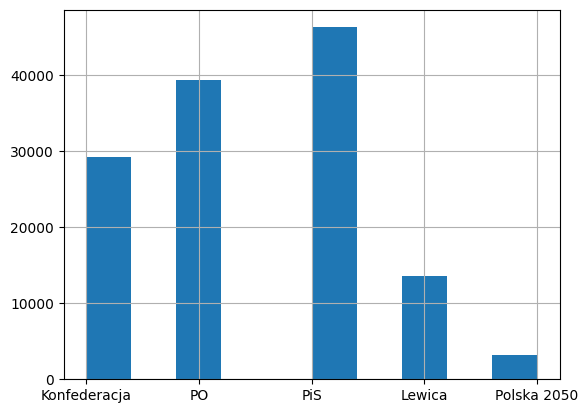

In [ ]:
df['party'].hist()

In [ ]:
df['party'].value_counts()

PiS             46299
PO              39354
Konfederacja    29184
Lewica          13606
Polska 2050      3192
Name: party, dtype: int64

In [ ]:
po_tweets = df.loc[df['party'] == 'PO']
print(len(po_tweets))
print(type(po_tweets))

42227
<class 'pandas.core.frame.DataFrame'>


### Najbardziej aktywni użytkownicy

In [ ]:
list(dict(po_tweets['user_id'].value_counts()).keys())[:20]

[917441213690675200,
 1307626595033714688,
 3307901823,
 819218415634313216,
 1282733529609232384,
 2907674452,
 1318145383986565127,
 54274904,
 873854439538511872,
 1065153478459355136,
 4587908235,
 1241413861477097478,
 1271401282394259459,
 856568385882161152,
 901431354633711617,
 906850310307696641,
 861151070,
 1064094402719752192,
 1351641647529000960,
 1606694744]

In [ ]:
#nie wiem z jakiegos powodu to nie dziala
#list(dict(po_tweets['user_id'].value_counts()[:20]).keys())

Teraz możemy stworzyć listę 20 najbardziej aktywnych (w liczbie tweetów) użytkowników danej partii:

In [ ]:
all_parties = list(df['party'].unique())
list_of_top_user = list()

for party in all_parties:
  party_tweets = df.loc[df['party'] == party]
  list_of_top_user.extend(list(dict(party_tweets['user_id'].value_counts()).keys())[:20])

In [ ]:
len(list_of_top_user)

100

### Stworzenie datasetu:

In [ ]:
data_df = df.loc[df['user_id'].isin(list_of_top_user)]
data_df.head(10)


,Unnamed: 0,tweet_id,user_id,party,topics,text,lemmatized_text,lemmatized_text_only_common
66,66.0,1435775827015315458,1221969871371677701,Konfederacja,LexTVN:TSUE|UE|TK,#Polexit Brak robotników z Polski. Niemieckie ...,NaN,NaN
67,67.0,1387941058101878784,1221969871371677701,Konfederacja,Aborcja,@strajkkobiet @Lewica Bida zesrała się i płacz...,NaN,NaN
68,68.0,1428473265060814848,1221969871371677701,Konfederacja,LexTVN,@Andruszkiewicz1 TVN poszukuje tanich pracowni...,NaN,NaN
69,69.0,1374887084859793411,1221969871371677701,Konfederacja,Aborcja,@tvp_info Pod hasłami obrony praw kobiet zaprz...,NaN,NaN
70,70.0,1372001242625536008,1221969871371677701,Konfederacja,LexTVN,@gambitek @Farma1956 @chili_mus @KamilDziubka ...,NaN,NaN
71,71.0,1378697482016849922,1221969871371677701,Konfederacja,LexTVN,@Justyna86876846 @Ela59704287 @holownia_k Stra...,NaN,NaN
72,72.0,1374163461639434241,1221969871371677701,Konfederacja,LexTVN,@BartStaszewski @panoptykon Życie w bańce GW i...,NaN,NaN
73,73.0,1396920591924580353,1221969871371677701,Konfederacja,TSUE|UE|TK,"#wtylewizji TSUE uznało, że zwyczaje kota Kacz...",NaN,NaN
74,74.0,1373766703935586306,1221969871371677701,Konfederacja,LexTVN,@bbudka Nie możecie zaszczuwać ludzi wraz z ic...,NaN,NaN
75,75.0,1459556594207932419,1221969871371677701,Konfederacja,LexTVN,@tvn24 Czemu TVN nie pomaga w Syrii? Przecież ...,NaN,NaN


In [ ]:

# shuffle
data_df = data_df.dropna(subset=['text'])
data_df = data_df.sample(frac=1).reset_index(drop=True)
data_df.head()


,Unnamed: 0,tweet_id,user_id,party,topics,text,lemmatized_text,lemmatized_text_only_common
0,54.0,1371421509118525441,1221188830834962435,PiS,LexTVN,Hołownia razem z platformą i lewicą wystawiają...,NaN,NaN
1,NaN,1387232892921786368,329439741,Lewica,Aborcja,szukam usilnie zgłoszonych budkę postulatów wa...,szukać usilnie zgłoszonych budka postulat waru...,szukać budka postulat popart funduszodbudowy p...
2,80.0,1447295900192288774,240225464,Polska 2050,TSUE|UE|TK,@Witold37939310 @Anna_Mierzynska @szymon_holow...,NaN,NaN
3,33.0,1457027644575387654,906862587886882817,PiS,TSUE|UE|TK,@JPomorze @barbaraanowacka Proszę poczytać. W ...,NaN,NaN
4,38.0,1446757142241873920,917441213690675200,PO,TSUE|UE|TK,Dzisiaj 2012 Przypadków #COVID19 ❗️\n4 Fala ju...,NaN,NaN


PO              5746
PiS             4646
Konfederacja    4154
Lewica          3566
Polska 2050     2452
Name: party, dtype: int64

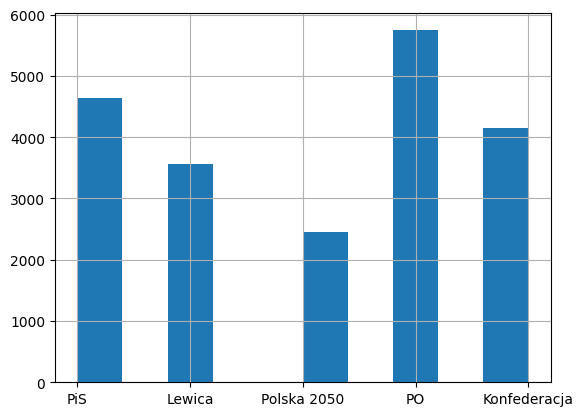

In [ ]:
data_df['party'].hist()
data_df['party'].value_counts()

#Preprocessing

In [ ]:
print(list(data_df['text'])[:20])

['wyjaśni oco chodzi twj aferze likwidować tvn czytał', '@MarcinTyc lextvn uderza w TVN, kompletnie inna koncesja', 'znają historie opisana wyborczej pokazana tvn antypolska', 'ludzie podpisują przynoszą podpisane listy walka prawa kobiet trwa pabianice legalną aborcją kompromisów legalnaaborcja aborcjabezkompromisow strajkkobiet kobietadecyduje', 'prawa wolności konstytucyjne np wolność prowadzenia działalności gospodarczej ograniczone wyłącznie wprowadzeniu stanu nadzwyczajnego drodze ustawy mówimy rząd działał niezgodnie konstytucją', 'Morawiecki w PE: Najwyższym prawem jest konstytucja https://t.co/gZRHp7kNny #wieszwiecej', 'złapał ryja jachire franka koniec piękne dojechał pis polexit', '@kaska_fu @strajkkobiet @Lewica Zaraz, to lepiej zablokować kasę dla ludzi. Polityka odmrazania sobie uszu? A może chodzi o to, że to nie PO, tylko lewica się dogadała. Dla przypomnienia - czy to co mówił Budka, pisała Jachira czy Lubnauer to też była kolaboracja z PiS? https://t.co/LXCJJZTLBT', '

In [ ]:
#usuwanie oznaczeń
for i in range(len(data_df.text)):
    start = "@"
    end = ' '
    text = data_df.loc[i, 'text']
    start_index = text.find(start)

    while start_index != -1:
        end_index = text.find(end, start_index + len(start))
        if end_index != -1:
            text = text[:start_index] + text[end_index:]
        else:
            text = text[:start_index]
        start_index = text.find(start, start_index + 1)

    data_df.loc[i, 'text'] = text

In [ ]:
#usuwanie linkow
for i in range(len(data_df.text)):
    start = "https://"
    end = ' '
    text = data_df.loc[i, 'text']
    start_index = text.find(start)

    while start_index != -1:
        end_index = text.find(end, start_index + len(start))
        if end_index != -1:
            text = text[:start_index] + text[end_index:]
        else:
            text = text[:start_index]
        start_index = text.find(start, start_index + 1)

    data_df.loc[i, 'text'] = text

In [ ]:
#usuwanie znaku nowej linii
for i in range(len(data_df.text)):
    data_df.loc[i, 'text']=data_df.loc[i, 'text'].replace("\n", " ")

In [ ]:
#usuwanie interpunkcji i wielkich liter
import string
for i in range(len(data_df.text)):
  data_df.loc[i, 'text']=data_df.loc[i,'text'].translate(str.maketrans('', '', string.punctuation)).lower()
data_df.text.head(50)

0     premier morawiecki reaguje decyzję tsue ws kop...
1     może to putin ma tak silne kompromanty na rząd...
2     tematy na które polacy są gotowi 🔴uczucia reli...
3        ale jakbyś miała wybrać obejrzenie porno a ...
4                        miazga pięknie rozjeżdżają tvn
5                   chociażby ujazdowski przytulony pis
6     skacząc kanałach zwróciłem uwagę fakt obecnośc...
7      toteż poniżej jest całość listu św mateusza z...
8        u tych łajdaków słowo wolność znaczy zupełn...
9     ostrołęka bełchatów turów  polska potrzebuje t...
10    policja prokuratura wyrobiła niszczeniem mieni...
11         piszesz dalej tsue wczorajszym lądowaniu ufo
12    naprawdę powiedział dozwolone zastosowanie pew...
13             jakieś wyjście zdrowy wkurw bywa twórczy
14     dzisiaj na szali jest polska konstytucja kont...
15    polsat skręca w pis tvn to platformerska tuba ...
16      im dalej od unii europejskiej tym bliżej fas...
17          ke się ucieszy strasburski trybunał 

In [ ]:
!pip install spacy==3.2.0
!python -m spacy download pl_core_news_md

In [ ]:
import spacy
nlp=spacy.load("pl_core_news_md")
def remove_stopwords(text):
  doc=nlp(text)
  good_words= [token.text for token in doc if not token.is_stop]
  return ' '.join(good_words)

def remove_nonwords(text):
    doc = nlp(text)
    good_words=[token.text for token in doc if token.is_alpha or token.is_digit]
    return ' '.join(good_words)



/usr/local/lib/python3.10/dist-packages/spacy/util.py:887: UserWarning: [W095] Model 'pl_core_news_md' (3.2.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.5.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
#usuwanie stop words i usuwanie slow z niepolskimi znakami trwa u mnie kolo 6-7 minut
data_df['text'] = data_df['text'].apply(remove_nonwords)
data_df['text'] = data_df['text'].apply(remove_stopwords)

In [ ]:
#lematyzacja tekstu
i=0
for text in data_df['text']:
  doc=nlp(text)
  lemmas= [token.lemma_ for token in doc]
  lemmatized_text=' '.join(lemmas)
  data_df.loc[i, 'lemmatized_text']=lemmatized_text
  i=i+1



In [ ]:
#najpopularniejsze wyrazy- rozważania i stworzenie zbioru przechowującego 5000 najpopularniejszych słów o długości większej niż 2 litery
from pandas.core.series import Frequency
from collections import Counter

word_frequencies=Counter()
aggregate=0
suma=0
set_of_most_common_words = set()
ile=5*(10**3)

for text in data_df['lemmatized_text']:
  lemmas=text.split()
  lemmas=[word for word in lemmas if len(word)>2]
  word_frequencies.update(lemmas)
  number=len(text.split())
  aggregate=aggregate+number
most_common_words=word_frequencies.most_common(ile)
for word, frequency in most_common_words:
    #print(word, frequency)
    suma= suma+frequency
    set_of_most_common_words.add(word)
print("W całym korpusie jest: " + str(aggregate) + " słów")
print("{} najpopularniejszcyh słów występuje łącznie w całym korpusie ".format(ile) + str(suma) + " razy")
print("Wszystkich, różnych słów w całym korpusie jest: " + str(len(word_frequencies)))

print(set_of_most_common_words)

W całym korpusie jest: 150451 słów
5000 najpopularniejszcyh słów występuje łącznie w całym korpusie 120734 razy
Wszystkich, różnych słów w całym korpusie jest: 22866
{'żebyś', 'wycofanie', 'zagrażać', 'neokrs', 'wyprowadzić', 'jaka', 'rozprawa', 'wydawać', 'wróg', 'kabała', 'paratrybunał', 'środowisko', 'czarny', 'okazywać', 'plk', 'wniosek', 'list', 'uczestnik', 'zgodność', 'dawka', 'okazja', 'przerzucić', 'zamordowanych', 'stołek', 'sprowadzić', 'przekazać', 'michnika', 'regulować', 'europejczyk', 'dyplomata', 'opinia', '2023', 'wyłączenie', 'pojawiać', 'ograniczanie', 'skandal', 'sposób', 'przyjaciółka', 'bilion', 'instytucja', 'odpuścić', 'nowyład', 'limita', 'ukryć', 'uzasadnić', 'nałożone', 'paranoja', 'sala', 'help', 'poradzić', 'kasia', 'tvn', 'zgodnie', 'sowiecki', 'powoływać', 'honorowy', 'nieustający', 'pan', 'model', 'kilkaset', 'dopuszczalny', 'refleksja', 'ścierwo', 'wsparcie', 'czechów', 'orban', 'zawieść', 'zapowiedzieć', 'oddanie', 'liberalizacja', 'szczyt', '247', 'ag

In [ ]:
#wyrzucic wszystko czego nie ma w set_of_most_common_words
i=0
for text in data_df['lemmatized_text']:
  text_0= text.split()
  text_only_common_words= [word for word in text_0 if word in set_of_most_common_words]
  data_df.loc[i, 'lemmatized_text_only_common']=' '.join(text_only_common_words)
  i=i+1

0    parchini wg siku tvn agentura ruskopruska nata...
1    naciekawsze komentarz jeden widzieć egoizm dru...
2    poziom ochrona prawo człowiek obecny polski ni...
3    lewica popierać prawo aborcyjny ponoć walczyć ...
4    obawiać rząd uznać wyrok tsue dwa przypadek 1 ...
5    zawora fantazja słabość mieć słabość szambo ko...
Name: lemmatized_text, dtype: object
0                                         tvn agentura
1    komentarz jeden widzieć drugi hołowni tusk dzi...
2    poziom ochrona prawo człowiek obecny polski ni...
3    lewica popierać prawo aborcyjny ponoć walczyć ...
4    obawiać rząd uznać wyrok tsue dwa przypadek wy...
5    słabość mieć słabość szambo koniec ciągnąć swó...
Name: lemmatized_text_only_common, dtype: object


In [ ]:
data_df.to_csv('drive/MyDrive/PoliTweets/preprocessed_data.csv', index=False)

#Budowanie modelu

##Przygotowanie danych do użycia w HerBERT

In [ ]:
!pip install datasets
!pip install transformers
!pip install sacremoses
!pip install transformers[torch]
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895241 sha256=ea1381f9f2d6d32191b0c0b3527d5aca1b819e1330252406f774273aa6b1d114
  Stored in directory: /root/.cache/pip/wheels/00/24/97/a2ea5324f36bc626e1ea

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#directory = 'drive/MyDrive'
#data_df=pd.read_csv(directory + '/preprocessed_data.csv')
#data_df=data_df.drop("ach", axis=1)
#data_df=data_df.drop("lemmatized_text_only_coommon", axis=1)

encoder = LabelEncoder()
data_df['labels'] = encoder.fit_transform(data_df['party'])


In [ ]:
def count_length(x):
  if type(x)==str:
    return len(x.split())
  else:
    return 0
max_length= max(data_df['text'].apply(count_length))

tweets_text=list(data_df['text'])
labels=list(data_df['labels'])
print(len(tweets_text))
print(max_length)
data_df.head()

In [ ]:
!pip install evaluate
import evaluate
import numpy as np
f1_metric = evaluate.load("f1")
recall_metric = evaluate.load("recall")
accuracy_metric=evaluate.load("accuracy")
def compute_metrics (eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis = -1)

    results = {}
    results.update(f1_metric.compute(predictions=preds, references = labels, average="weighted"))
    results.update(recall_metric.compute(predictions=preds, references = labels, average="weighted"))
    results.update(accuracy_metric.compute(predictions=preds, references = labels))
    return results

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 4.1 MB/s eta 0:00:00


In [ ]:
from datasets import Dataset
from transformers import AutoTokenizer

dataset_text = Dataset.from_pandas(data_df[['text','labels']])

#dataset_lemmatized_text = Dataset.from_pandas(data_df[['lemmatized_text','labels']])
#dataset_lemmatized_text = dataset_lemmatized_text.rename_column("lemmatized_text", "text")

#dataset_lemmatized_text_only_common = Dataset.from_pandas(data_df[['lemmatized_text_only_common','labels']].dropna())#okazało się, że coś zrobiło się całkiem puste
#dataset_lemmatized_text_only_common = dataset_lemmatized_text_only_common.rename_column("lemmatized_text_only_common", "text")

tokenizer = AutoTokenizer.from_pretrained("allegro/herbert-base-cased")


def tokenize_function(examples):
    return tokenizer(examples["text"], padding='max_length', truncation=True)

tokenized_datasets_text = dataset_text.map(tokenize_function, batched=True)
#tokenized_datasets_lemmatized_text = dataset_lemmatized_text.map(tokenize_function, batched=True)
#tokenized_datasets_lemmatized_text_only_common = dataset_lemmatized_text_only_common.map(tokenize_function, batched=True)

Map:   0%|          | 0/20564 [00:00<?, ? examples/s]

In [ ]:
final_dataset = tokenized_datasets_text.train_test_split(test_size=0.1)

train_dataset_text = final_dataset["train"].shuffle(seed=42).select(range(4000))
eval_dataset_text = final_dataset["test"].select(range(500))
test_dataset_text = final_dataset["test"].select(range(500,1000))

#final_dataset = tokenized_datasets_lemmatized_text.train_test_split(test_size=0.1)

#train_dataset_lemmatized_text = final_dataset["train"].shuffle(seed=42).select(range(4000))
#eval_dataset_lemmatized_text = final_dataset["test"].select(range(500))
#test_dataset_lemmatized_text = final_dataset["test"].select(range(500,1000))

#final_dataset = tokenized_datasets_lemmatized_text_only_common.train_test_split(test_size=0.1)

#train_dataset_lemmatized_text_only_common = final_dataset["train"].shuffle(seed=42).select(range(4000))
#eval_dataset_lemmatized_text_only_common = final_dataset["test"].select(range(500))
#test_dataset_lemmatized_text_only_common = final_dataset["test"].select(range(500,1000))

##Wandb i stworzenie modelu

In [ ]:
!pip install wandb -qqq
import wandb
wandb.login()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.7/214.7 kB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

###Model dla text

In [ ]:
from transformers import AutoModelForSequenceClassification

model=AutoModelForSequenceClassification.from_pretrained("allegro/herbert-base-cased", num_labels=5)

Some weights of the model checkpoint at allegro/herbert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.sso.sso_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.sso.sso_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification 

In [ ]:
from transformers import TrainingArguments, Trainer

wandb.init(project="projekt inzynieria lingwistyczna", name="text_20_epochs_plain_text")

training_args = TrainingArguments(output_dir="wyniki_text",
                                  evaluation_strategy="epoch",
                                  logging_strategy="epoch",
                                  num_train_epochs=20,
                                  report_to="wandb",
                                  run_name="text_20_epochs_plain_text",
                                  learning_rate=10**(-2),

                                  )


In [ ]:
model_1=model
trainer = Trainer(
    model=model_1,
    args=training_args,
    train_dataset=train_dataset_text,
    eval_dataset=eval_dataset_text,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1,Recall,Accuracy
1,2.853000,2.205205,0.127210,0.286000,0.286000
2,2.843000,3.277963,0.027359,0.124000,0.124000
3,2.868400,2.075610,0.057189,0.184000,0.184000
4,2.820200,1.781992,0.088746,0.234000,0.234000
5,2.632400,2.186419,0.088746,0.234000,0.234000
6,2.846400,4.588333,0.088746,0.234000,0.234000
7,2.608000,1.976235,0.027359,0.124000,0.124000
8,2.609400,2.508597,0.027359,0.124000,0.124000
9,2.539600,1.963461,0.127210,0.286000,0.286000
10,2.297200,1.744955,0.088746,0.234000,0.234000


TrainOutput(global_step=10000, training_loss=2.322438977050781, metrics={'train_runtime': 7440.5352, 'train_samples_per_second': 10.752, 'train_steps_per_second': 1.344, 'total_flos': 2.104945139712e+16, 'train_loss': 2.322438977050781, 'epoch': 20.0})

In [ ]:
evaluation_text_10_epochs=trainer.evaluate(eval_dataset=test_dataset_text)
wandb.log({"evaluation_lemmatized_text":evaluation_text_10_epochs})
print(evaluation_text_10_epochs)
wandb.finish()

{'eval_loss': 1.5524977445602417, 'eval_f1': 0.11480314960629921, 'eval_recall': 0.27, 'eval_accuracy': 0.27, 'eval_runtime': 14.5804, 'eval_samples_per_second': 34.293, 'eval_steps_per_second': 4.321, 'epoch': 20.0}


eval/accuracy,█▁▄▆▆▆▁▁█▆██▃████▆██▇
eval/f1,█▁▃▅▅▅▁▁█▅██▃████▅██▇
eval/loss,▃▅▂▂▂█▂▃▂▁▃▂▂▂▂▁▂▁▁▁▁
eval/recall,█▁▄▆▆▆▁▁█▆██▃████▆██▇
eval/runtime,▃▆▃▅▆▅▁▆▅▄▃▃█▅▃▆▃▅▄▄▃
eval/samples_per_second,▆▃▆▄▃▄█▃▄▄▆▆▁▄▆▃▆▄▅▅▆
eval/steps_per_second,▆▃▆▄▃▄█▃▄▅▆▆▁▄▆▃▆▄▅▅▆
train/epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇█████
train/global_step,▁▁▁▁▂▂▂▂▂▂▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇██████
train/learning_rate,██▇▇▇▆▆▅▅▅▄▄▄▃▃▂▂▂▁▁
train/loss,████▇█▆▆▆▅▄▄▄▃▃▂▂▂▁▁


###Model dla lemmatized_text

In [ ]:
wandb.init(project="projekt inzynieria lingwistyczna", name="lemmatized_text_10_epochs")

training_args2= TrainingArguments(output_dir="wyniki_text",
                                  evaluation_strategy="epoch",
                                  logging_strategy="epoch",
                                  num_train_epochs=10,
                                  report_to="wandb",
                                  run_name="lemmatized_text_10_epochs",
                                  learning_rate=10**(-2),

                                  )

model_2=model
trainer = Trainer(
    model=model_2,
    args=training_args2,
    train_dataset=train_dataset_lemmatized_text,
    eval_dataset=eval_dataset_lemmatized_text,
    compute_metrics=compute_metrics
)

trainer.train()

evaluation_lemmatized_text_10_epochs=trainer.evaluate(eval_dataset=test_dataset_lemmatized_text)
wandb.log({"evaluation_lemmatized_text":evaluation_lemmatized_text_10_epochs})
print(evaluation_lemmatized_text_10_epochs)

wandb.finish()

### Model dla lemmatized_text_only_common

In [ ]:
wandb.init(project="projekt inzynieria lingwistyczna", name="lemmatized_text_only_common_21_epochs")

training_args = TrainingArguments(output_dir="wyniki_text",
                                  evaluation_strategy="epoch",
                                  logging_strategy="epoch",
                                  num_train_epochs=21,
                                  report_to="wandb",
                                  run_name="lemmatized_text_only_common_21_epochs",
                                  learning_rate=10**(-2),

                                  )
model_3=model
trainer = Trainer(
    model=model_3,
    args=training_args,
    train_dataset=train_dataset_lemmatized_text_only_common,
    eval_dataset=eval_dataset_lemmatized_text_only_common,
    compute_metrics=compute_metrics
)

trainer.train()

evaluation_lemmatized_text_only_common_10_epochs=trainer.evaluate(eval_dataset=test_dataset_lemmatized_text_only_common)
wandb.log({"evaluation_lemmatized_text":evaluation_lemmatized_text_only_common_10_epochs})
print(evaluation_lemmatized_text_only_common_10_epochs)
wandb.finish()

wandb: Currently logged in as: julian-petrykowski. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1,Recall,Accuracy
1,2.693700,3.384280,0.070375,0.206000,0.206000
2,2.748600,2.581164,0.125632,0.284000,0.284000
3,2.793600,3.090258,0.053793,0.178000,0.178000
4,2.643200,2.270671,0.092903,0.240000,0.240000
5,2.666000,1.907109,0.092903,0.240000,0.240000
6,2.526600,1.795204,0.070375,0.206000,0.206000
7,2.561700,2.450413,0.125632,0.284000,0.284000
8,2.450200,1.667928,0.092903,0.240000,0.240000


Epoch,Training Loss,Validation Loss,F1,Recall,Accuracy
1,2.693700,3.384280,0.070375,0.206000,0.206000
2,2.748600,2.581164,0.125632,0.284000,0.284000
3,2.793600,3.090258,0.053793,0.178000,0.178000
4,2.643200,2.270671,0.092903,0.240000,0.240000
5,2.666000,1.907109,0.092903,0.240000,0.240000
6,2.526600,1.795204,0.070375,0.206000,0.206000
7,2.561700,2.450413,0.125632,0.284000,0.284000
8,2.450200,1.667928,0.092903,0.240000,0.240000
9,2.457300,2.593766,0.125632,0.284000,0.284000
10,2.354800,2.089651,0.053793,0.178000,0.178000


{'eval_loss': 1.5754269361495972, 'eval_f1': 0.12250000000000001, 'eval_recall': 0.28, 'eval_accuracy': 0.28, 'eval_runtime': 16.3436, 'eval_samples_per_second': 30.593, 'eval_steps_per_second': 3.855, 'epoch': 21.0}


eval/accuracy,▃█▁▅▅▃█▅█▁▅█▁▃▁▃▁▅█▅██
eval/f1,▃█▁▅▅▃█▅█▁▅█▁▃▁▃▁▅█▅██
eval/loss,█▅▇▄▂▂▄▁▅▃▂▂▃▁▃▁▃▁▁▂▁▁
eval/recall,▃█▁▅▅▃█▅█▁▅█▁▃▁▃▁▅█▅██
eval/runtime,▂▂▄▃▁▃▁▃▃▂▃▃▃▂▂▂▂▂▂▃▄█
eval/samples_per_second,▇▇▅▆█▆█▆▆▇▆▆▆▇▇▇▇▇▆▆▅▁
eval/steps_per_second,▇▇▅▆█▆█▆▆▇▆▆▆▇▇▇▇▇▆▆▅▁
train/epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇█████
train/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇██████
train/learning_rate,██▇▇▇▆▆▆▅▅▄▄▄▃▃▃▂▂▂▁▁
train/loss,▇██▇▇▆▇▆▆▅▅▅▄▃▃▃▂▂▂▁▁


###Benchmark

In [ ]:
wandb.init(project="projekt inzynieria lingwistyczna", name="benchmark")

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_lemmatized_text_only_common,
    eval_dataset=eval_dataset_lemmatized_text_only_common,
    compute_metrics=compute_metrics
)
evaluation=trainer.evaluate(eval_dataset=test_dataset_lemmatized_text_only_common)
wandb.log({"evaluation_lemmatized_text":evaluation})
wandb.finish()

eval/accuracy,▁▁█▆█▇
eval/f1,▁▁█▆█▇
eval/loss,▄▂█▂▁▁
eval/recall,▁▁█▆█▇
eval/runtime,▁▂▄▅▄█
eval/samples_per_second,█▇▅▄▅▁
eval/steps_per_second,█▇▅▄▅▁
train/epoch,▁▁▃▃▅▅▆▆████
train/global_step,▁▁▃▃▅▅▆▆█████
train/learning_rate,█▆▅▃▁
train/loss,█▆▄▂▁
